In [66]:
import pandas as pd
import numpy as np
import re
import random
from datetime import datetime

# Reading the form responses
data = pd.read_csv('synthetic_data.csv')
pd.set_option('display.max_columns', None)
data

,role,frequency_of_travel,primary_purpose,travel_days,travel_hours,ISB_Service,bus_stop_board,bus_stop_alight,day_of_the_week,time_start,travel_duration,frequency,punctuality,cleanliness,safety,coverage,crowdedness,usage_influence_convenience,usage_influence_cost,usage_influence_lack_of_options,usage_influence_availability_of_parking,usage_influence_environmental,prioritize_frequency,prioritize_punctuality,prioritize_cleanliness,prioritize_safety,prioritize_bus_route_coverage,prioritize_crowdedness,not_able_to_get_on,additional_features_frequency,additional_features_seats,additional_features_cleanliness,additional_features_comfortable,additional_features_route_coverage,additional_features_updates,issues_with_quality_of_info,special_events,seasonal_changes,is_valid
0,Undergraduate student,Daily,Commute to classes,"Monday, Tuesday, Wednesday, Thursday, Friday","0900 - 1000, 1000 - 1100, 1100 - 1200, 1200 - ...",A2,Opp University Hall,Ventus,Friday,09:30:00,15 - 20 minutes,2,5,4,5,4,5,3,2,1,5,4,3,4,6,5,2,1,Occasionally,1,2,6,5,2,3,Yes,3,"No, service is consistent",True
1,Undergraduate student,3 - 4 days a week,Commute to classes,"Monday, Wednesday, Thursday","0900 - 1000, 1100 - 1200, 1300 - 1400, 1500 - ...",D2,KR MRT,UTown,Thursday,09:30:00,10 - 15 minutes,4,3,4,3,4,1,1,2,3,4,5,1,4,6,5,3,2,Frequently,1,2,6,5,4,3,No,4,"No, service is consistent",True
2,Undergraduate student,3 - 4 days a week,Commute to classes,"Monday, Wednesday, Thursday","1700 - 1800, 1800 - 1900, 2100 - 2200, 2200 - ...",A2,UHC,S17,Thursday,17:50:00,< 5 minutes,2,4,4,3,4,3,1,2,3,4,5,1,2,3,5,4,6,Occasionally,1,4,6,5,2,6,No,3,"Yes, service improves/worsens (please specify ...",True
3,Undergraduate student,3 - 4 days a week,Commute to classes,"Monday, Thursday, Friday, Saturday, Sunday","1100 - 1200, 1200 - 1300, 1800 - 1900, 2100 - ...",A1,PGP Terminal,Opp UHC,Sunday,11:30:00,10 - 15 minutes,4,4,4,4,2,5,1,2,3,5,4,3,2,6,4,5,1,Occasionally,1,2,5,6,6,3,No,3,"No, service is consistent",True
4,Undergraduate student,1 - 2 days a week,Commute to classes,"Tuesday, Thursday, Friday","0700 - 0800, 1000 - 1100, 1100 - 1200, 1200 - ...",A1,KR MRT,LT27,Friday,07:50:00,< 5 minutes,4,3,4,4,4,5,1,3,2,5,4,1,3,6,4,5,2,Frequently,1,2,6,5,4,2,No,1,"Yes, service improves/worsens (please specify ...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55845,Undergraduate student,Daily,Commute to classes,"Monday, Wednesday, Friday","0900 - 1000, 1100 - 1200, 1600 - 1700",K,KR MRT,CLB,Friday,09:24:30,5 - 10 minutes,2,3,4,2,4,4,3,2,1,4,5,1,4,6,5,3,2,Occasionally,1,4,6,5,4,6,No,3,"No, service is consistent",True
55846,Visitor,Less than once a week,Travelling to food establishments,"Monday, Thursday, Friday, Saturday, Sunday","1100 - 1200, 1400 - 1500, 1500 - 1600, 1600 - ...",A1,KR MRT,CLB,Sunday,18:50:01,10 - 15 minutes,1,4,4,5,4,5,1,2,3,4,5,1,4,3,6,5,2,Frequently,1,1,6,5,4,2,Yes,4,"Yes, service improves/worsens (please specify ...",True
55847,Undergraduate student,1 - 2 days a week,Commute to classes,"Monday, Tuesday, Wednesday, Thursday, Friday, ...","0900 - 1000, 1100 - 1200, 1200 - 1300, 1500 - ...",A1,LT13,KR MRT,Friday,11:41:45,5 - 10 minutes,2,4,5,3,4,4,1,2,4,5,3,1,4,5,3,6,2,Occasionally,1,4,6,5,6,5,No,4,"Yes, service improves/worsens (please specify ...",True
55848,Undergraduate student,1 - 2 days a week,Commute to classes,"Monday, Tuesday, Thursday, Friday","1100 - 1200, 1200 - 1300",A2,Opp YIH,S17,Tuesday,11:45:45,< 5 minutes,4,4,4,5,4,1,3,2,1,4,5,1,3,6,5,2,4,Occasionally,2,4,6,5,3,3,No,2,"No, service is consistent",True


# Data Preprocessing

Dropping unnecessary columns and simplifying data

In [67]:
# drop columns unlikely to be needed for user segmentation
# drop travel_days and travel_hours, and use day_of_the_week and time_start
data_dropped = data.drop(data.columns[[3, 4]], axis=1)
data_dropped

,role,frequency_of_travel,primary_purpose,ISB_Service,bus_stop_board,bus_stop_alight,day_of_the_week,time_start,travel_duration,frequency,punctuality,cleanliness,safety,coverage,crowdedness,usage_influence_convenience,usage_influence_cost,usage_influence_lack_of_options,usage_influence_availability_of_parking,usage_influence_environmental,prioritize_frequency,prioritize_punctuality,prioritize_cleanliness,prioritize_safety,prioritize_bus_route_coverage,prioritize_crowdedness,not_able_to_get_on,additional_features_frequency,additional_features_seats,additional_features_cleanliness,additional_features_comfortable,additional_features_route_coverage,additional_features_updates,issues_with_quality_of_info,special_events,seasonal_changes,is_valid
0,Undergraduate student,Daily,Commute to classes,A2,Opp University Hall,Ventus,Friday,09:30:00,15 - 20 minutes,2,5,4,5,4,5,3,2,1,5,4,3,4,6,5,2,1,Occasionally,1,2,6,5,2,3,Yes,3,"No, service is consistent",True
1,Undergraduate student,3 - 4 days a week,Commute to classes,D2,KR MRT,UTown,Thursday,09:30:00,10 - 15 minutes,4,3,4,3,4,1,1,2,3,4,5,1,4,6,5,3,2,Frequently,1,2,6,5,4,3,No,4,"No, service is consistent",True
2,Undergraduate student,3 - 4 days a week,Commute to classes,A2,UHC,S17,Thursday,17:50:00,< 5 minutes,2,4,4,3,4,3,1,2,3,4,5,1,2,3,5,4,6,Occasionally,1,4,6,5,2,6,No,3,"Yes, service improves/worsens (please specify ...",True
3,Undergraduate student,3 - 4 days a week,Commute to classes,A1,PGP Terminal,Opp UHC,Sunday,11:30:00,10 - 15 minutes,4,4,4,4,2,5,1,2,3,5,4,3,2,6,4,5,1,Occasionally,1,2,5,6,6,3,No,3,"No, service is consistent",True
4,Undergraduate student,1 - 2 days a week,Commute to classes,A1,KR MRT,LT27,Friday,07:50:00,< 5 minutes,4,3,4,4,4,5,1,3,2,5,4,1,3,6,4,5,2,Frequently,1,2,6,5,4,2,No,1,"Yes, service improves/worsens (please specify ...",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55845,Undergraduate student,Daily,Commute to classes,K,KR MRT,CLB,Friday,09:24:30,5 - 10 minutes,2,3,4,2,4,4,3,2,1,4,5,1,4,6,5,3,2,Occasionally,1,4,6,5,4,6,No,3,"No, service is consistent",True
55846,Visitor,Less than once a week,Travelling to food establishments,A1,KR MRT,CLB,Sunday,18:50:01,10 - 15 minutes,1,4,4,5,4,5,1,2,3,4,5,1,4,3,6,5,2,Frequently,1,1,6,5,4,2,Yes,4,"Yes, service improves/worsens (please specify ...",True
55847,Undergraduate student,1 - 2 days a week,Commute to classes,A1,LT13,KR MRT,Friday,11:41:45,5 - 10 minutes,2,4,5,3,4,4,1,2,4,5,3,1,4,5,3,6,2,Occasionally,1,4,6,5,6,5,No,4,"Yes, service improves/worsens (please specify ...",True
55848,Undergraduate student,1 - 2 days a week,Commute to classes,A2,Opp YIH,S17,Tuesday,11:45:45,< 5 minutes,4,4,4,5,4,1,3,2,1,4,5,1,3,6,5,2,4,Occasionally,2,4,6,5,3,3,No,2,"No, service is consistent",True


Changing time_start to have 3 broad categroies for time for easier encoding

In [69]:
data_dropped['time_start'] = pd.to_datetime(data_dropped['time_start'], format='%H:%M:%S', errors='coerce')
data_dropped['time_start'] = data_dropped['time_start'].dt.time

def categorize_time(time):
    if time >= pd.to_datetime('07:00:00').time() and time < pd.to_datetime('12:00:00').time():
        return 'Morning'
    elif time >= pd.to_datetime('12:00:00').time() and time < pd.to_datetime('17:00:00').time():
        return 'Afternoon'
    else:
        return 'Evening'

# replace with the new values in the time_of_day column
data_dropped['time_of_day'] = data_dropped['time_start'].apply(categorize_time)

data_dropped

,role,frequency_of_travel,primary_purpose,ISB_Service,bus_stop_board,bus_stop_alight,day_of_the_week,time_start,travel_duration,frequency,punctuality,cleanliness,safety,coverage,crowdedness,usage_influence_convenience,usage_influence_cost,usage_influence_lack_of_options,usage_influence_availability_of_parking,usage_influence_environmental,prioritize_frequency,prioritize_punctuality,prioritize_cleanliness,prioritize_safety,prioritize_bus_route_coverage,prioritize_crowdedness,not_able_to_get_on,additional_features_frequency,additional_features_seats,additional_features_cleanliness,additional_features_comfortable,additional_features_route_coverage,additional_features_updates,issues_with_quality_of_info,special_events,seasonal_changes,is_valid,time_of_day
0,Undergraduate student,Daily,Commute to classes,A2,Opp University Hall,Ventus,Friday,09:30:00,15 - 20 minutes,2,5,4,5,4,5,3,2,1,5,4,3,4,6,5,2,1,Occasionally,1,2,6,5,2,3,Yes,3,"No, service is consistent",True,Morning
1,Undergraduate student,3 - 4 days a week,Commute to classes,D2,KR MRT,UTown,Thursday,09:30:00,10 - 15 minutes,4,3,4,3,4,1,1,2,3,4,5,1,4,6,5,3,2,Frequently,1,2,6,5,4,3,No,4,"No, service is consistent",True,Morning
2,Undergraduate student,3 - 4 days a week,Commute to classes,A2,UHC,S17,Thursday,17:50:00,< 5 minutes,2,4,4,3,4,3,1,2,3,4,5,1,2,3,5,4,6,Occasionally,1,4,6,5,2,6,No,3,"Yes, service improves/worsens (please specify ...",True,Evening
3,Undergraduate student,3 - 4 days a week,Commute to classes,A1,PGP Terminal,Opp UHC,Sunday,11:30:00,10 - 15 minutes,4,4,4,4,2,5,1,2,3,5,4,3,2,6,4,5,1,Occasionally,1,2,5,6,6,3,No,3,"No, service is consistent",True,Morning
4,Undergraduate student,1 - 2 days a week,Commute to classes,A1,KR MRT,LT27,Friday,07:50:00,< 5 minutes,4,3,4,4,4,5,1,3,2,5,4,1,3,6,4,5,2,Frequently,1,2,6,5,4,2,No,1,"Yes, service improves/worsens (please specify ...",True,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55845,Undergraduate student,Daily,Commute to classes,K,KR MRT,CLB,Friday,09:24:30,5 - 10 minutes,2,3,4,2,4,4,3,2,1,4,5,1,4,6,5,3,2,Occasionally,1,4,6,5,4,6,No,3,"No, service is consistent",True,Morning
55846,Visitor,Less than once a week,Travelling to food establishments,A1,KR MRT,CLB,Sunday,18:50:01,10 - 15 minutes,1,4,4,5,4,5,1,2,3,4,5,1,4,3,6,5,2,Frequently,1,1,6,5,4,2,Yes,4,"Yes, service improves/worsens (please specify ...",True,Evening
55847,Undergraduate student,1 - 2 days a week,Commute to classes,A1,LT13,KR MRT,Friday,11:41:45,5 - 10 minutes,2,4,5,3,4,4,1,2,4,5,3,1,4,5,3,6,2,Occasionally,1,4,6,5,6,5,No,4,"Yes, service improves/worsens (please specify ...",True,Morning
55848,Undergraduate student,1 - 2 days a week,Commute to classes,A2,Opp YIH,S17,Tuesday,11:45:45,< 5 minutes,4,4,4,5,4,1,3,2,1,4,5,1,3,6,5,2,4,Occasionally,2,4,6,5,3,3,No,2,"No, service is consistent",True,Morning


Encoding data

In [70]:
from sklearn.preprocessing import OrdinalEncoder

ordinal_columns = ['frequency_of_travel',
                   'day_of_the_week',
                   'time_of_day',
                   'travel_duration']

nominal_columns = ['role', 'primary_purpose']

# One-hot encode the nominal columns
nominal_encoded = pd.get_dummies(data_dropped[nominal_columns], drop_first=True)
nominal_encoded = nominal_encoded.astype(int) # convert to 0/1 values

# Ordinal encoding for the ordinal columns
encoder = OrdinalEncoder(categories=[
    ['Less than once a week', '1 - 2 days a week', '3 - 4 days a week', 'Daily'],
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ['Morning', 'Afternoon', 'Evening'],
    ['< 5 minutes', '5 - 10 minutes', '10 - 15 minutes', '15 - 20 minutes', '20 - 30 minutes', '> 30 minutes']
])

ordinal_encoded = pd.DataFrame(encoder.fit_transform(data_dropped[ordinal_columns]), columns=ordinal_columns)

# columns that were already previously encoded
features = ['frequency', 'punctuality', 'cleanliness', 'safety', 'coverage',
    'usage_influence_convenience', 'usage_influence_cost', 'usage_influence_lack_of_options', 'usage_influence_availability_of_parking', 'usage_influence_environmental',
               'prioritize_frequency', 'prioritize_punctuality', 'prioritize_cleanliness', 'prioritize_safety', 'prioritize_bus_route_coverage', 'prioritize_crowdedness']

# Adding back columns that were already encoded
data_encoded = pd.concat([ordinal_encoded, data_dropped[features], nominal_encoded], axis=1)

data_encoded


,frequency_of_travel,day_of_the_week,time_of_day,travel_duration,frequency,punctuality,cleanliness,safety,coverage,usage_influence_convenience,usage_influence_cost,usage_influence_lack_of_options,usage_influence_availability_of_parking,usage_influence_environmental,prioritize_frequency,prioritize_punctuality,prioritize_cleanliness,prioritize_safety,prioritize_bus_route_coverage,prioritize_crowdedness,role_Undergraduate student,role_Visitor,primary_purpose_Commute to classes,primary_purpose_Travelling to extracurricular activities,primary_purpose_Travelling to food establishments,primary_purpose_Travelling to work
0,3.0,4.0,0.0,3.0,2,5,4,5,4,3,2,1,5,4,3,4,6,5,2,1,1,0,1,0,0,0
1,2.0,3.0,0.0,2.0,4,3,4,3,4,1,2,3,4,5,1,4,6,5,3,2,1,0,1,0,0,0
2,2.0,3.0,2.0,0.0,2,4,4,3,4,1,2,3,4,5,1,2,3,5,4,6,1,0,1,0,0,0
3,2.0,6.0,0.0,2.0,4,4,4,4,2,1,2,3,5,4,3,2,6,4,5,1,1,0,1,0,0,0
4,1.0,4.0,0.0,0.0,4,3,4,4,4,1,3,2,5,4,1,3,6,4,5,2,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55845,3.0,4.0,0.0,1.0,2,3,4,2,4,3,2,1,4,5,1,4,6,5,3,2,1,0,1,0,0,0
55846,0.0,6.0,2.0,2.0,1,4,4,5,4,1,2,3,4,5,1,4,3,6,5,2,0,1,0,0,1,0
55847,1.0,4.0,0.0,1.0,2,4,5,3,4,1,2,4,5,3,1,4,5,3,6,2,1,0,1,0,0,0
55848,1.0,1.0,0.0,0.0,4,4,4,5,4,3,2,1,4,5,1,3,6,5,2,4,1,0,1,0,0,0


Standardise data

In [71]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_encoded)
data_scaled = pd.DataFrame(data_scaled, columns=data_encoded.columns)
data_scaled

,frequency_of_travel,day_of_the_week,time_of_day,travel_duration,frequency,punctuality,cleanliness,safety,coverage,usage_influence_convenience,usage_influence_cost,usage_influence_lack_of_options,usage_influence_availability_of_parking,usage_influence_environmental,prioritize_frequency,prioritize_punctuality,prioritize_cleanliness,prioritize_safety,prioritize_bus_route_coverage,prioritize_crowdedness,role_Undergraduate student,role_Visitor,primary_purpose_Commute to classes,primary_purpose_Travelling to extracurricular activities,primary_purpose_Travelling to food establishments,primary_purpose_Travelling to work
0,1.283093,0.904824,-1.249264,1.255532,-0.731443,1.746693,0.022185,1.637063,0.333880,2.310867,-0.212584,-1.86862,0.780237,-0.659699,1.702545,1.300980,0.657550,0.395806,-1.029743,-1.164489,0.300940,-0.277377,0.372679,-0.106898,-0.230732,-0.087151
1,0.135309,0.281811,-1.249264,0.297104,1.205224,-0.529786,0.022185,-0.440985,0.333880,-0.576424,-0.212584,0.56390,-1.037863,1.125907,-0.712244,1.300980,0.657550,0.395806,-0.378929,-0.567559,0.300940,-0.277377,0.372679,-0.106898,-0.230732,-0.087151
2,0.135309,0.281811,1.324709,-1.619751,-0.731443,0.608454,0.022185,-0.440985,0.333880,-0.576424,-0.212584,0.56390,-1.037863,1.125907,-0.712244,-0.963762,-2.442844,0.395806,0.271885,1.820161,0.300940,-0.277377,0.372679,-0.106898,-0.230732,-0.087151
3,0.135309,2.150849,-1.249264,0.297104,1.205224,0.608454,0.022185,0.598039,-2.113097,-0.576424,-0.212584,0.56390,0.780237,-0.659699,1.702545,-0.963762,0.657550,-0.775982,0.922700,-1.164489,0.300940,-0.277377,0.372679,-0.106898,-0.230732,-0.087151
4,-1.012475,0.904824,-1.249264,-1.619751,1.205224,-0.529786,0.022185,0.598039,0.333880,-0.576424,1.501157,-0.65236,0.780237,-0.659699,-0.712244,0.168609,0.657550,-0.775982,0.922700,-0.567559,0.300940,-0.277377,0.372679,-0.106898,-0.230732,-0.087151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55845,1.283093,0.904824,-1.249264,-0.661324,-0.731443,-0.529786,0.022185,-1.480010,0.333880,2.310867,-0.212584,-1.86862,-1.037863,1.125907,-0.712244,1.300980,0.657550,0.395806,-0.378929,-0.567559,0.300940,-0.277377,0.372679,-0.106898,-0.230732,-0.087151
55846,-2.160259,2.150849,1.324709,0.297104,-1.699777,0.608454,0.022185,1.637063,0.333880,-0.576424,-0.212584,0.56390,-1.037863,1.125907,-0.712244,1.300980,-2.442844,1.567594,0.922700,-0.567559,-3.322925,3.605204,-2.683276,-0.106898,4.334042,-0.087151
55847,-1.012475,0.904824,-1.249264,-0.661324,-0.731443,0.608454,1.312842,-0.440985,0.333880,-0.576424,-0.212584,1.78016,0.780237,-2.445305,-0.712244,1.300980,-0.375915,-1.947769,1.573514,-0.567559,0.300940,-0.277377,0.372679,-0.106898,-0.230732,-0.087151
55848,-1.012475,-0.964214,-1.249264,-1.619751,1.205224,0.608454,0.022185,1.637063,0.333880,2.310867,-0.212584,-1.86862,-1.037863,1.125907,-0.712244,0.168609,0.657550,0.395806,-1.029743,0.626301,0.300940,-0.277377,0.372679,-0.106898,-0.230732,-0.087151


Choose random sample containing 20% of data to reduce runtime for t-sne

In [72]:
data_sample = data_scaled.sample(frac=0.20, random_state=42)  # 20% sample with a fixed random seed for reproducibility
data_sample

,frequency_of_travel,day_of_the_week,time_of_day,travel_duration,frequency,punctuality,cleanliness,safety,coverage,usage_influence_convenience,usage_influence_cost,usage_influence_lack_of_options,usage_influence_availability_of_parking,usage_influence_environmental,prioritize_frequency,prioritize_punctuality,prioritize_cleanliness,prioritize_safety,prioritize_bus_route_coverage,prioritize_crowdedness,role_Undergraduate student,role_Visitor,primary_purpose_Commute to classes,primary_purpose_Travelling to extracurricular activities,primary_purpose_Travelling to food establishments,primary_purpose_Travelling to work
53856,0.135309,-1.587226,-1.249264,1.255532,-0.731443,0.608454,0.022185,-1.480010,-0.889608,-0.576424,-0.212584,0.56390,-1.037863,1.125907,1.702545,-0.963762,-0.375915,1.567594,-1.680557,0.626301,0.300940,-0.277377,0.372679,-0.106898,-0.230732,-0.087151
23619,-1.012475,0.281811,0.037722,0.297104,-0.731443,-1.668025,0.022185,-0.440985,-0.889608,-0.576424,1.501157,-0.65236,-1.037863,1.125907,1.702545,1.300980,-0.375915,-3.119557,1.573514,-1.164489,0.300940,-0.277377,0.372679,-0.106898,-0.230732,-0.087151
17202,1.283093,-0.964214,0.037722,-0.661324,1.205224,-0.529786,0.022185,-1.480010,-0.889608,-0.576424,-0.212584,0.56390,-1.037863,1.125907,0.495151,0.168609,0.657550,0.395806,0.271885,-1.164489,0.300940,-0.277377,0.372679,-0.106898,-0.230732,-0.087151
45692,1.283093,-1.587226,0.037722,-0.661324,0.236891,0.608454,0.022185,0.598039,-0.889608,-0.576424,-0.212584,0.56390,-1.037863,1.125907,1.702545,-0.963762,0.657550,-0.775982,0.922700,-1.164489,0.300940,-0.277377,0.372679,-0.106898,-0.230732,-0.087151
15056,-2.160259,0.904824,-1.249264,1.255532,0.236891,-0.529786,0.022185,-1.480010,0.333880,0.867221,1.501157,-1.86862,0.780237,-0.659699,-0.712244,0.168609,-0.375915,-0.775982,1.573514,-0.567559,-3.322925,3.605204,0.372679,-0.106898,-0.230732,-0.087151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23182,1.283093,-0.341201,-1.249264,1.255532,-0.731443,0.608454,0.022185,-1.480010,0.333880,-0.576424,-0.212584,0.56390,-1.037863,1.125907,0.495151,1.300980,0.657550,0.395806,-1.680557,0.029371,-3.322925,3.605204,0.372679,-0.106898,-0.230732,-0.087151
32704,-2.160259,-1.587226,-1.249264,0.297104,1.205224,-1.668025,1.312842,-0.440985,0.333880,-0.576424,-0.212584,0.56390,0.780237,-0.659699,1.702545,1.300980,0.657550,0.395806,-1.680557,-0.567559,-3.322925,3.605204,0.372679,-0.106898,-0.230732,-0.087151
30064,-1.012475,0.281811,-1.249264,-0.661324,-0.731443,-1.668025,1.312842,0.598039,0.333880,0.867221,-1.926324,0.56390,0.780237,-0.659699,-0.712244,-0.963762,-2.442844,1.567594,0.271885,1.223231,0.300940,-0.277377,0.372679,-0.106898,-0.230732,-0.087151
49526,0.135309,0.281811,-1.249264,0.297104,-0.731443,0.608454,0.022185,0.598039,0.333880,-0.576424,-0.212584,0.56390,0.780237,-0.659699,-0.712244,-0.963762,0.657550,0.395806,0.271885,0.029371,0.300940,-0.277377,0.372679,-0.106898,-0.230732,-0.087151


#Doing t-sne

In [73]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, perplexity=30, random_state=42)
data_tsne = tsne.fit_transform(data_sample)

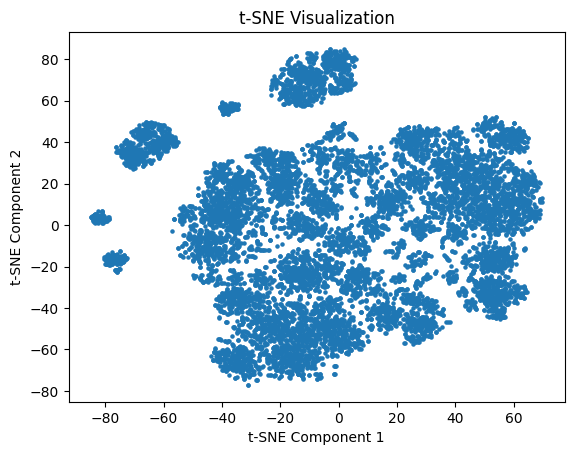

In [44]:
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], s=5)
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.title("t-SNE Visualization")
plt.show()

In [45]:
# Prepare to colour based on primary_purpose
data_sample['primary_purpose'] = data_sample[['primary_purpose_Commute to classes',
                                              'primary_purpose_Travelling to extracurricular activities',
                                              'primary_purpose_Travelling to food establishments',
                                              'primary_purpose_Travelling to work']].idxmax(axis=1)
data_sample['primary_purpose'] = data_sample['primary_purpose'].str.replace('primary_purpose_', '')

data_sample

,frequency_of_travel,day_of_the_week,time_of_day,travel_duration,frequency,punctuality,cleanliness,safety,coverage,usage_influence_convenience,usage_influence_cost,usage_influence_lack_of_options,usage_influence_availability_of_parking,usage_influence_environmental,prioritize_frequency,prioritize_punctuality,prioritize_cleanliness,prioritize_safety,prioritize_bus_route_coverage,prioritize_crowdedness,role_Undergraduate student,role_Visitor,primary_purpose_Commute to classes,primary_purpose_Travelling to extracurricular activities,primary_purpose_Travelling to food establishments,primary_purpose_Travelling to work,primary_purpose
53856,0.135309,-1.587226,-1.249264,1.255532,-0.731443,0.608454,0.022185,-1.480010,-0.889608,-0.576424,-0.212584,0.56390,-1.037863,1.125907,1.702545,-0.963762,-0.375915,1.567594,-1.680557,0.626301,0.300940,-0.277377,0.372679,-0.106898,-0.230732,-0.087151,Commute to classes
23619,-1.012475,0.281811,0.037722,0.297104,-0.731443,-1.668025,0.022185,-0.440985,-0.889608,-0.576424,1.501157,-0.65236,-1.037863,1.125907,1.702545,1.300980,-0.375915,-3.119557,1.573514,-1.164489,0.300940,-0.277377,0.372679,-0.106898,-0.230732,-0.087151,Commute to classes
17202,1.283093,-0.964214,0.037722,-0.661324,1.205224,-0.529786,0.022185,-1.480010,-0.889608,-0.576424,-0.212584,0.56390,-1.037863,1.125907,0.495151,0.168609,0.657550,0.395806,0.271885,-1.164489,0.300940,-0.277377,0.372679,-0.106898,-0.230732,-0.087151,Commute to classes
45692,1.283093,-1.587226,0.037722,-0.661324,0.236891,0.608454,0.022185,0.598039,-0.889608,-0.576424,-0.212584,0.56390,-1.037863,1.125907,1.702545,-0.963762,0.657550,-0.775982,0.922700,-1.164489,0.300940,-0.277377,0.372679,-0.106898,-0.230732,-0.087151,Commute to classes
15056,-2.160259,0.904824,-1.249264,1.255532,0.236891,-0.529786,0.022185,-1.480010,0.333880,0.867221,1.501157,-1.86862,0.780237,-0.659699,-0.712244,0.168609,-0.375915,-0.775982,1.573514,-0.567559,-3.322925,3.605204,0.372679,-0.106898,-0.230732,-0.087151,Commute to classes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23182,1.283093,-0.341201,-1.249264,1.255532,-0.731443,0.608454,0.022185,-1.480010,0.333880,-0.576424,-0.212584,0.56390,-1.037863,1.125907,0.495151,1.300980,0.657550,0.395806,-1.680557,0.029371,-3.322925,3.605204,0.372679,-0.106898,-0.230732,-0.087151,Commute to classes
32704,-2.160259,-1.587226,-1.249264,0.297104,1.205224,-1.668025,1.312842,-0.440985,0.333880,-0.576424,-0.212584,0.56390,0.780237,-0.659699,1.702545,1.300980,0.657550,0.395806,-1.680557,-0.567559,-3.322925,3.605204,0.372679,-0.106898,-0.230732,-0.087151,Commute to classes
30064,-1.012475,0.281811,-1.249264,-0.661324,-0.731443,-1.668025,1.312842,0.598039,0.333880,0.867221,-1.926324,0.56390,0.780237,-0.659699,-0.712244,-0.963762,-2.442844,1.567594,0.271885,1.223231,0.300940,-0.277377,0.372679,-0.106898,-0.230732,-0.087151,Commute to classes
49526,0.135309,0.281811,-1.249264,0.297104,-0.731443,0.608454,0.022185,0.598039,0.333880,-0.576424,-0.212584,0.56390,0.780237,-0.659699,-0.712244,-0.963762,0.657550,0.395806,0.271885,0.029371,0.300940,-0.277377,0.372679,-0.106898,-0.230732,-0.087151,Commute to classes


<ipython-input-46-eff924d409aa>:21: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(x, y, c=colors, cmap='viridis')  # You can use other colormaps like 'jet', 'plasma', etc.


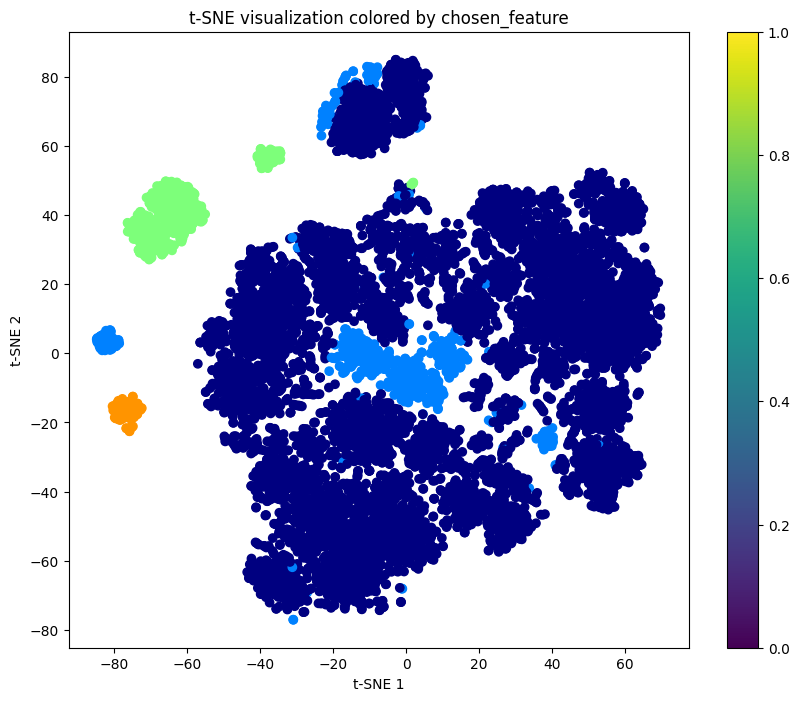

In [46]:
import matplotlib.pyplot as plt

x = data_tsne[:, 0]
y = data_tsne[:, 1]

chosen_features = 'primary_purpose'
labels = data_sample[chosen_features]

# For categorical features, assign colors to each category
if labels.dtype == 'O':
    unique_labels = labels.unique()
    color_map = {label: plt.cm.jet(i / len(unique_labels)) for i, label in enumerate(unique_labels)}
    colors = labels.map(color_map)
else:
    # If it's a continuous variable, apply a colormap
    colors = plt.cm.viridis((labels - labels.min()) / (labels.max() - labels.min()))

plt.figure(figsize=(10, 8))
plt.scatter(x, y, c=colors, cmap='viridis')
plt.title('t-SNE visualization colored by ' + 'chosen_feature')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')
plt.colorbar()  # Adds color scale for continuous variables
plt.show()

# Needs and pain points


Remove one-hot encoding for nominal columns for easier visualisation later on

In [77]:
ordinal_columns = ['frequency_of_travel', 'day_of_the_week', 'time_of_day', 'travel_duration', 'not_able_to_get_on']

# Ordinal encoding for the ordinal columns
encoder = OrdinalEncoder(categories=[
    ['Less than once a week', '1 - 2 days a week', '3 - 4 days a week', 'Daily'],
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
    ['Morning', 'Afternoon', 'Evening'],
    ['< 5 minutes', '5 - 10 minutes', '10 - 15 minutes', '15 - 20 minutes', '20 - 30 minutes', '> 30 minutes'],
    ['Never', 'Rarely', 'Occasionally', 'Frequently', 'Always']
])

nominal_columns = ['role', 'primary_purpose', 'bus_stop_board', 'bus_stop_alight', 'ISB_Service']
ordinal_encoded = pd.DataFrame(encoder.fit_transform(data_dropped[ordinal_columns]), columns=ordinal_columns)

# columns that were already previously encoded
features = ['frequency', 'punctuality', 'cleanliness', 'safety', 'coverage',
    'usage_influence_convenience', 'usage_influence_cost', 'usage_influence_lack_of_options', 'usage_influence_availability_of_parking', 'usage_influence_environmental',
               'prioritize_frequency', 'prioritize_punctuality', 'prioritize_cleanliness', 'prioritize_safety', 'prioritize_bus_route_coverage', 'prioritize_crowdedness',
               'additional_features_frequency', 'additional_features_seats', 'additional_features_cleanliness', 'additional_features_comfortable',
               'additional_features_route_coverage', 'additional_features_updates', 'crowdedness', 'special_events']

# Adding back columns that were already encoded
data_encoded_all = pd.concat([ordinal_encoded, data_dropped[features], data_dropped[nominal_columns]], axis=1)

data_encoded_all

,frequency_of_travel,day_of_the_week,time_of_day,travel_duration,not_able_to_get_on,frequency,punctuality,cleanliness,safety,coverage,usage_influence_convenience,usage_influence_cost,usage_influence_lack_of_options,usage_influence_availability_of_parking,usage_influence_environmental,prioritize_frequency,prioritize_punctuality,prioritize_cleanliness,prioritize_safety,prioritize_bus_route_coverage,prioritize_crowdedness,additional_features_frequency,additional_features_seats,additional_features_cleanliness,additional_features_comfortable,additional_features_route_coverage,additional_features_updates,crowdedness,special_events,role,primary_purpose,bus_stop_board,bus_stop_alight,ISB_Service
0,3.0,4.0,0.0,3.0,2.0,2,5,4,5,4,3,2,1,5,4,3,4,6,5,2,1,1,2,6,5,2,3,5,3,Undergraduate student,Commute to classes,Opp University Hall,Ventus,A2
1,2.0,3.0,0.0,2.0,3.0,4,3,4,3,4,1,2,3,4,5,1,4,6,5,3,2,1,2,6,5,4,3,1,4,Undergraduate student,Commute to classes,KR MRT,UTown,D2
2,2.0,3.0,2.0,0.0,2.0,2,4,4,3,4,1,2,3,4,5,1,2,3,5,4,6,1,4,6,5,2,6,3,3,Undergraduate student,Commute to classes,UHC,S17,A2
3,2.0,6.0,0.0,2.0,2.0,4,4,4,4,2,1,2,3,5,4,3,2,6,4,5,1,1,2,5,6,6,3,5,3,Undergraduate student,Commute to classes,PGP Terminal,Opp UHC,A1
4,1.0,4.0,0.0,0.0,3.0,4,3,4,4,4,1,3,2,5,4,1,3,6,4,5,2,1,2,6,5,4,2,5,1,Undergraduate student,Commute to classes,KR MRT,LT27,A1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55845,3.0,4.0,0.0,1.0,2.0,2,3,4,2,4,3,2,1,4,5,1,4,6,5,3,2,1,4,6,5,4,6,4,3,Undergraduate student,Commute to classes,KR MRT,CLB,K
55846,0.0,6.0,2.0,2.0,3.0,1,4,4,5,4,1,2,3,4,5,1,4,3,6,5,2,1,1,6,5,4,2,5,4,Visitor,Travelling to food establishments,KR MRT,CLB,A1
55847,1.0,4.0,0.0,1.0,2.0,2,4,5,3,4,1,2,4,5,3,1,4,5,3,6,2,1,4,6,5,6,5,4,4,Undergraduate student,Commute to classes,LT13,KR MRT,A1
55848,1.0,1.0,0.0,0.0,2.0,4,4,4,5,4,3,2,1,4,5,1,3,6,5,2,4,2,4,6,5,3,3,1,2,Undergraduate student,Commute to classes,Opp YIH,S17,A2


Shortening the names of the values in primary-purpose for easier readability

In [78]:
# Mapping of old values to new values
purpose_mapping = {
    'Commute to classes': 'Class',
    'Travelling to work': 'Work',
    'Travelling to food establishments': 'Food',
    'Travelling to extracurricular activities': 'Extracurriculars',
    'Accessing campus facilities (gym, library etc.)': 'Campus facilities',
    'Attending school events': 'School events'}

# Apply the mapping
data_encoded_all['primary_purpose'] = data_encoded_all['primary_purpose'].replace(purpose_mapping)

Creating boxplots for values across primary_purpose values

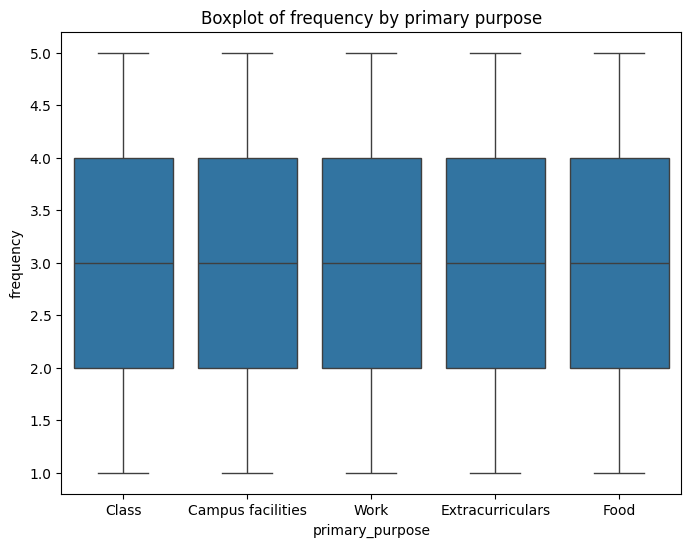

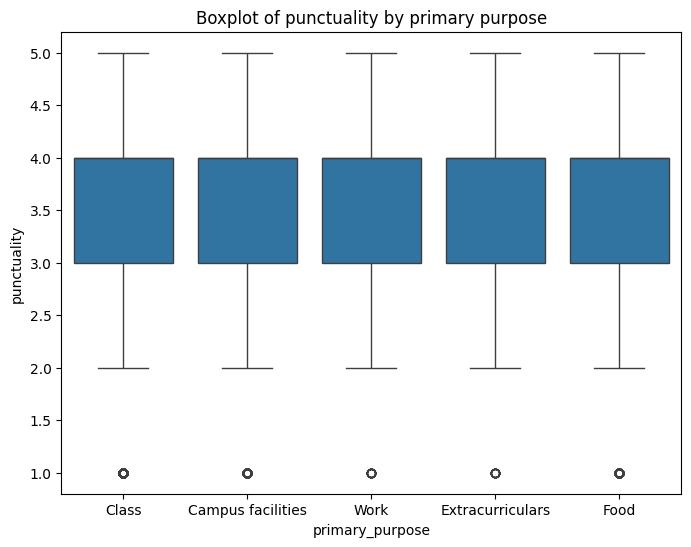

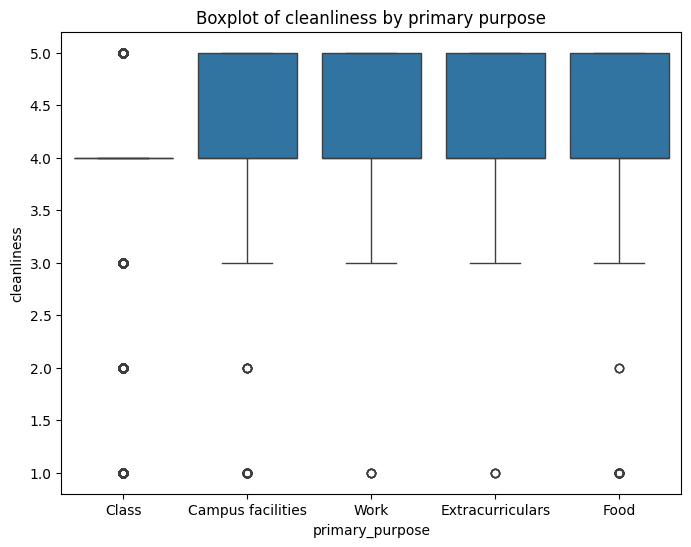

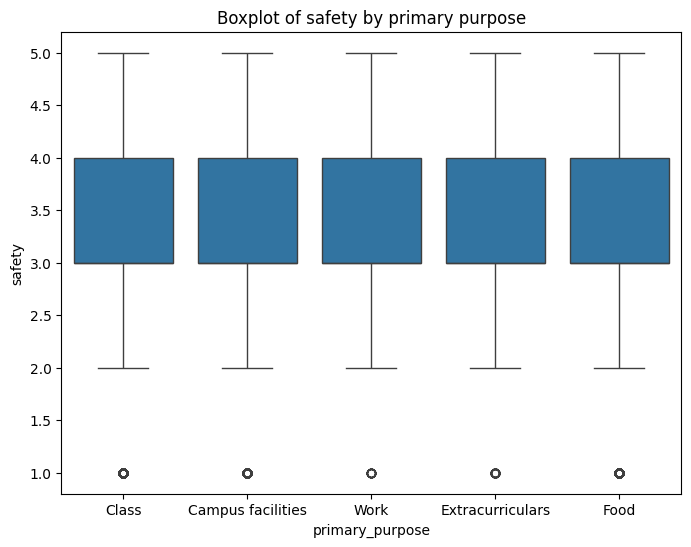

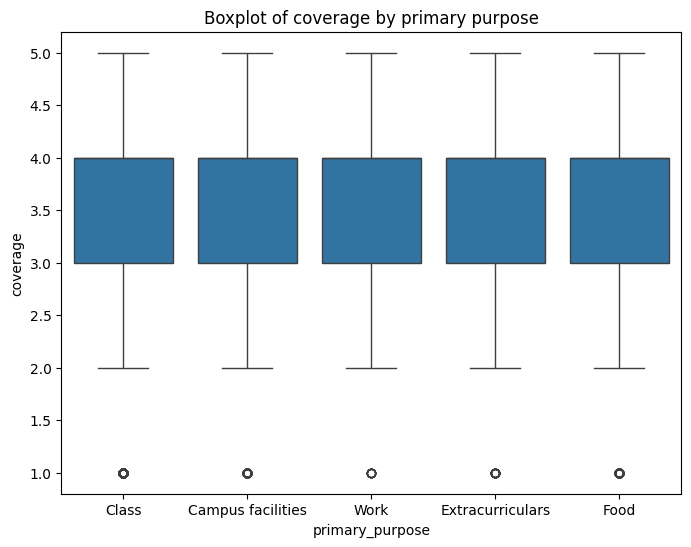

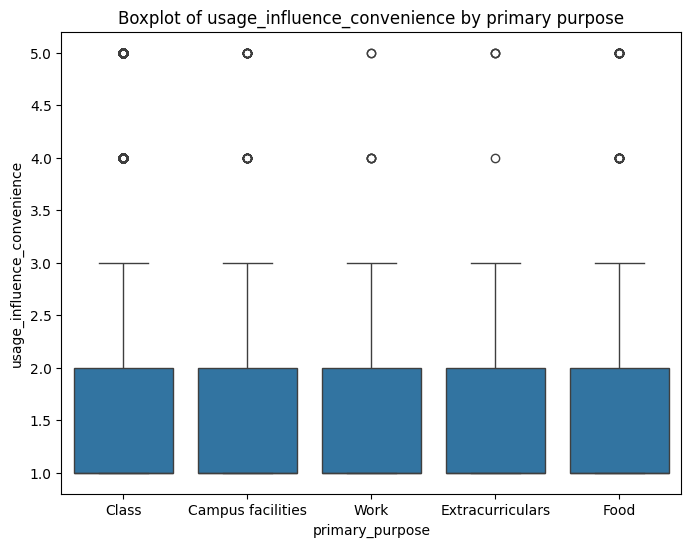

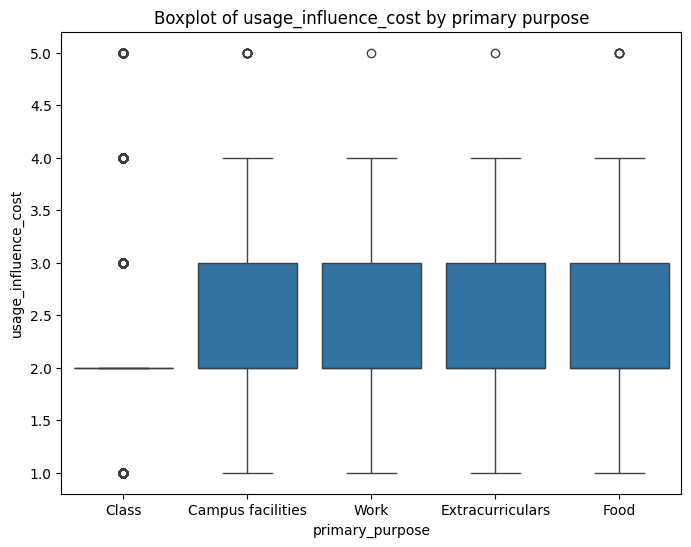

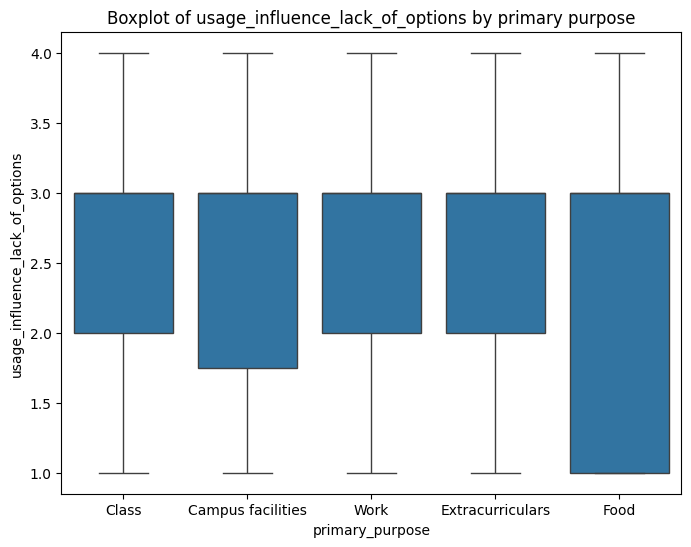

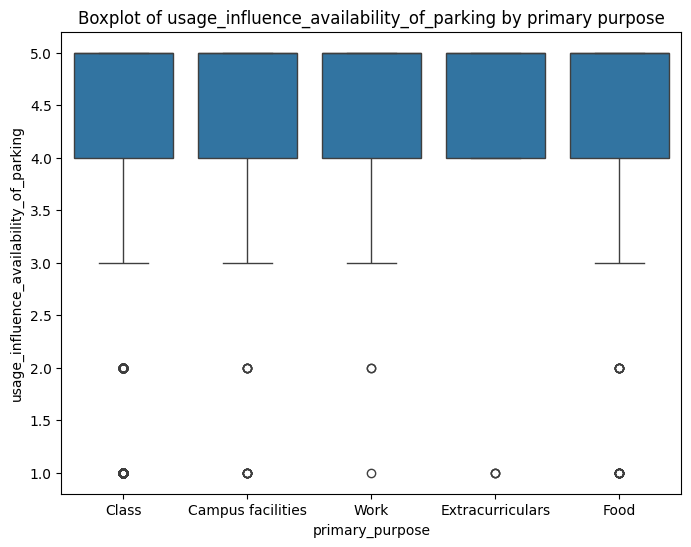

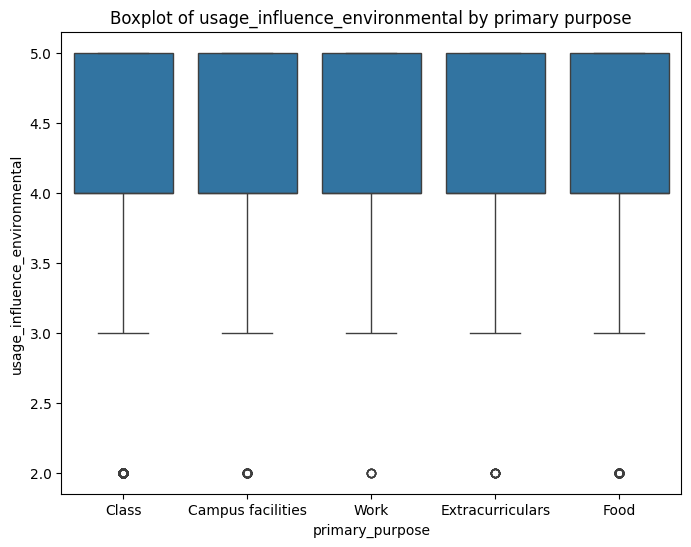

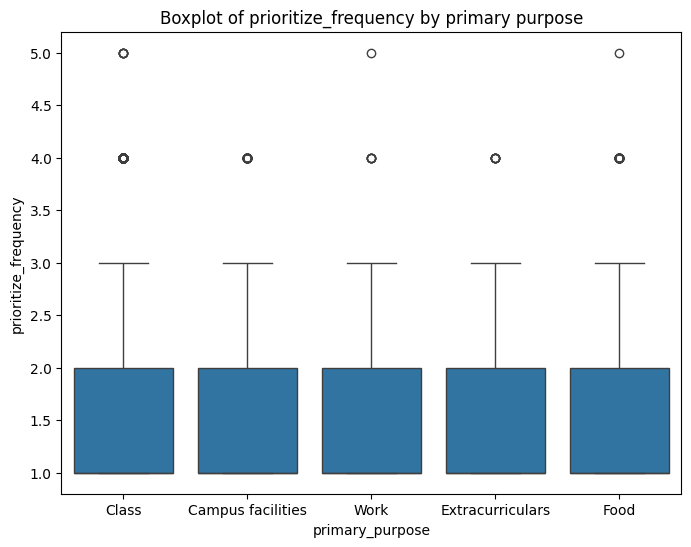

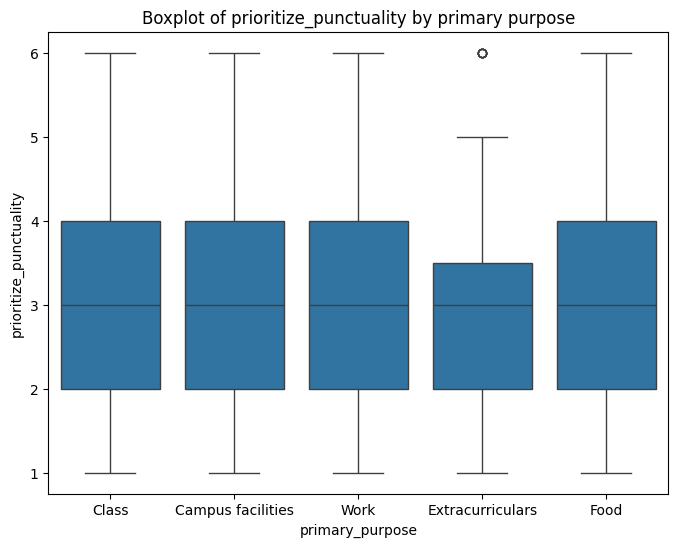

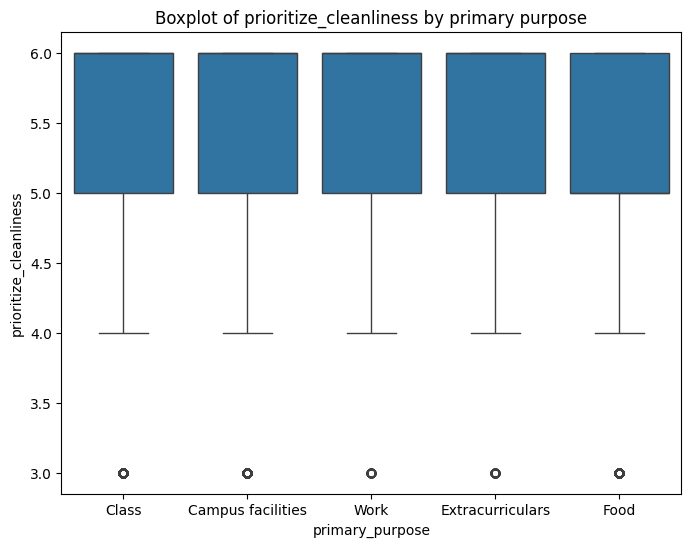

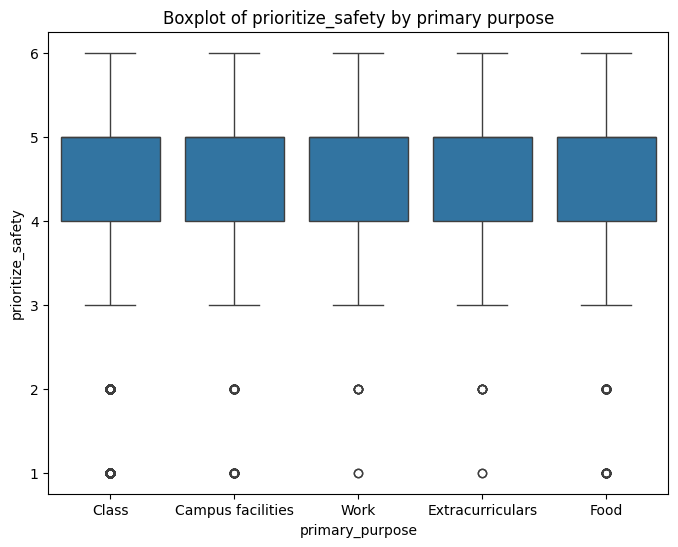

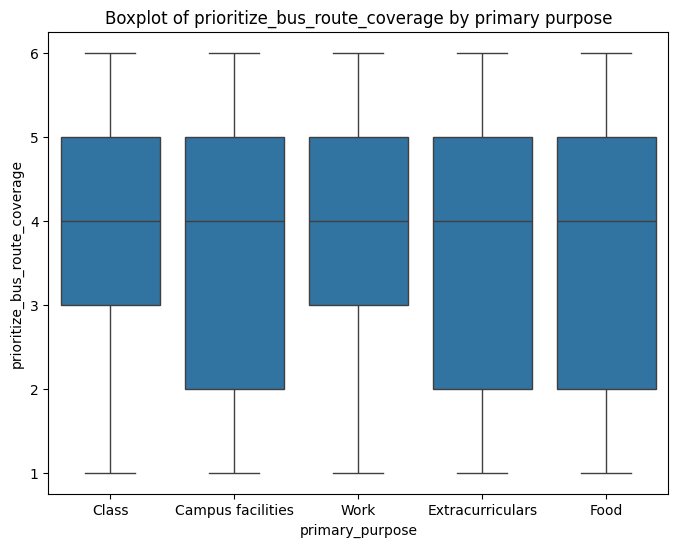

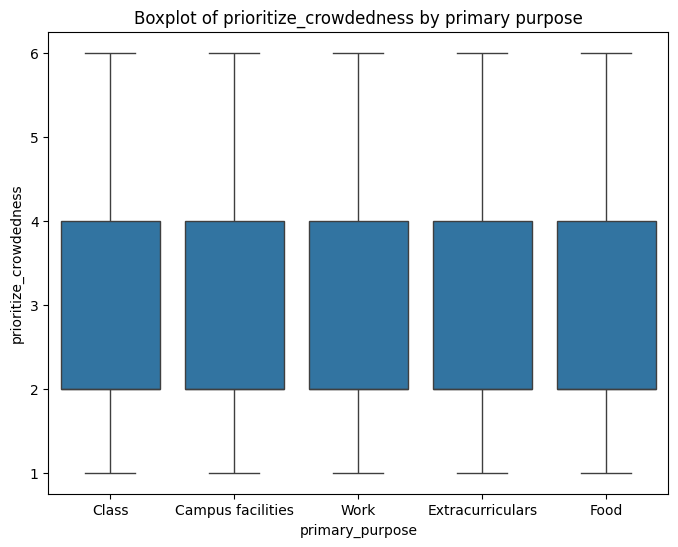

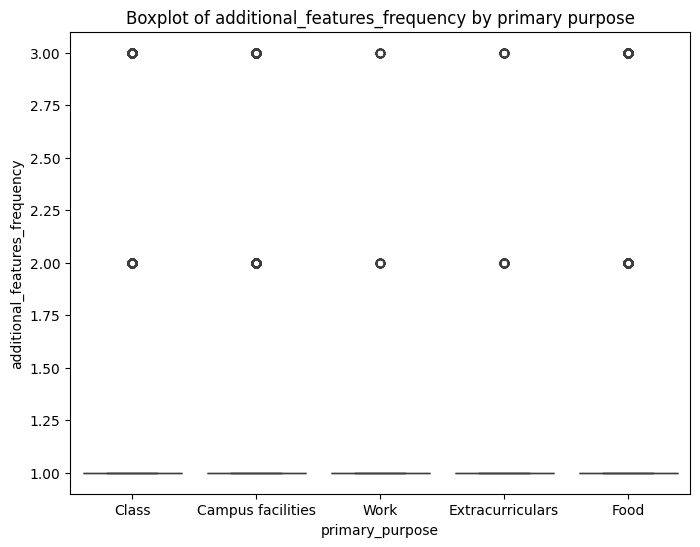

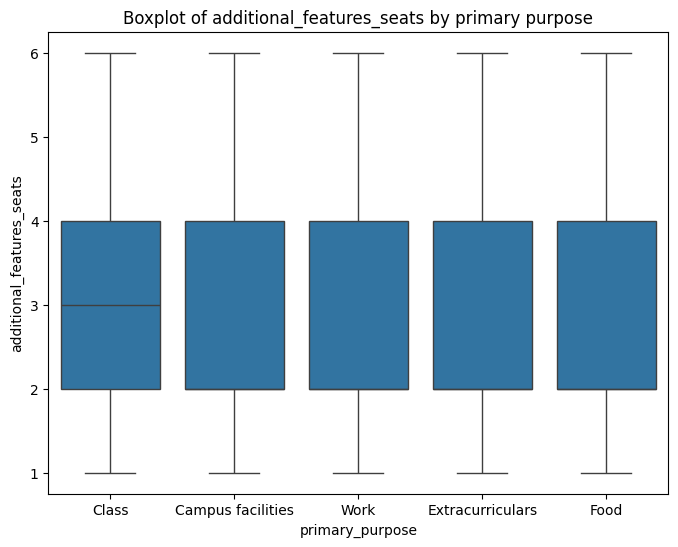

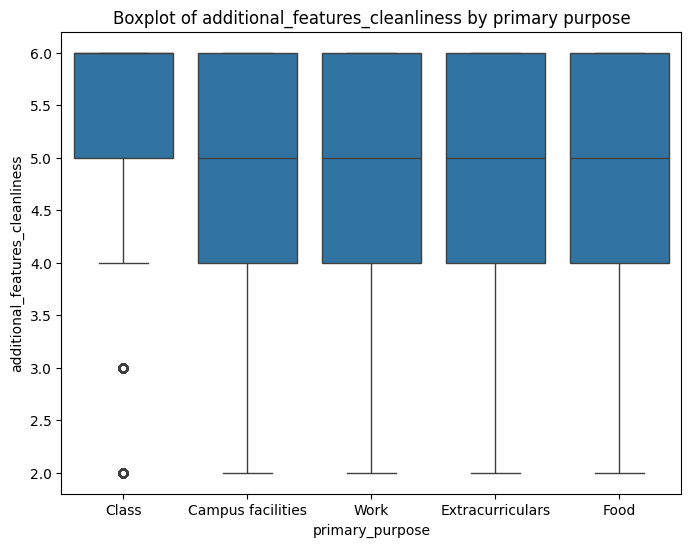

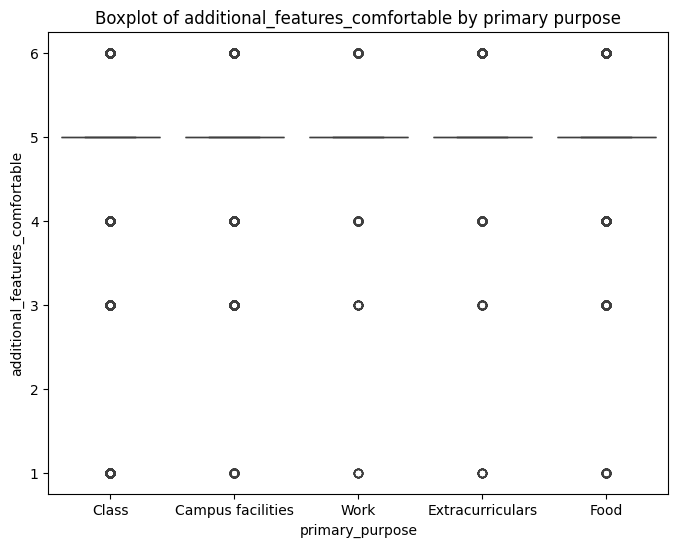

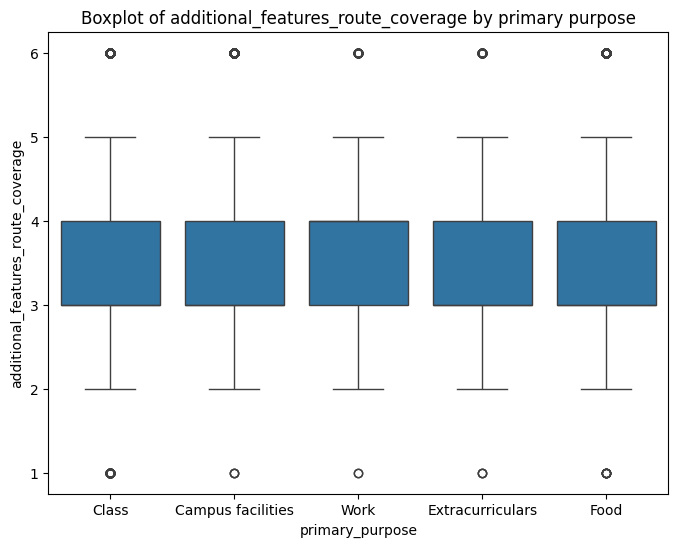

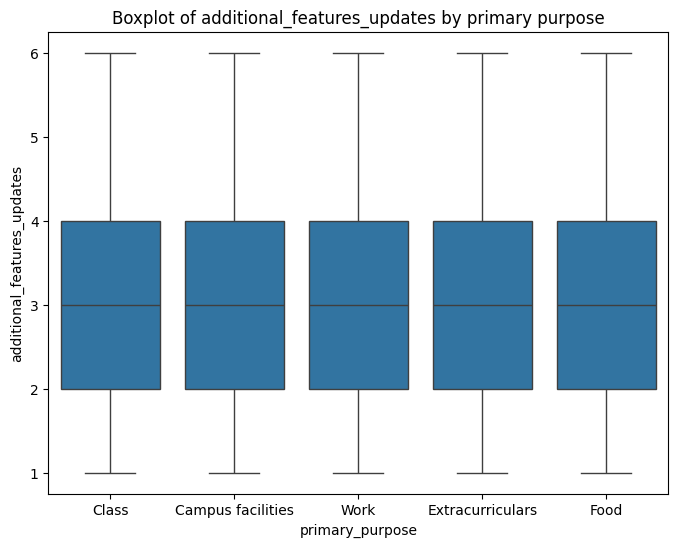

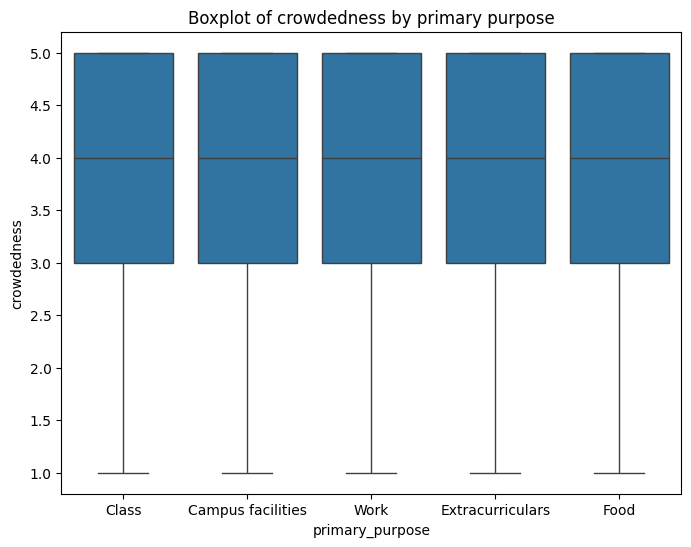

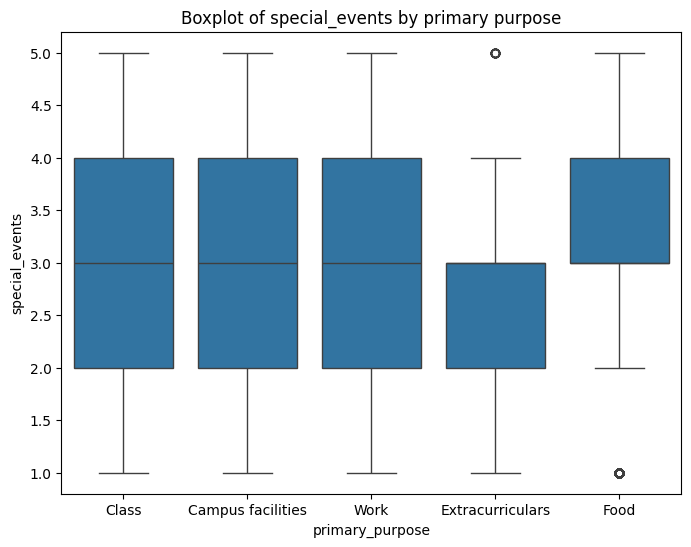

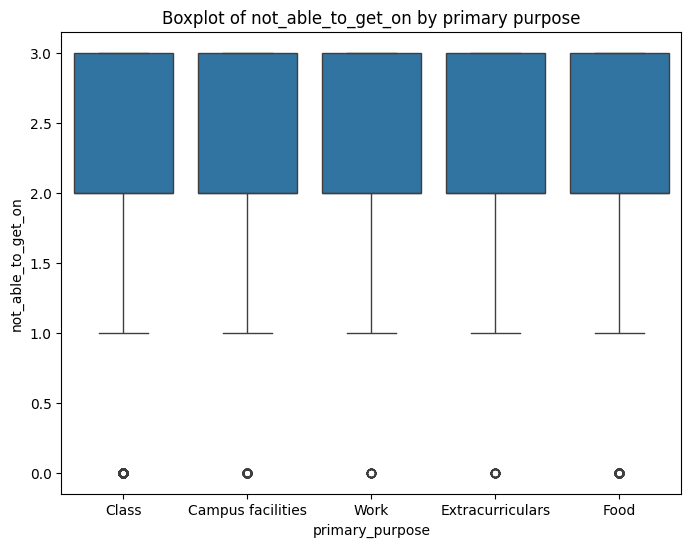

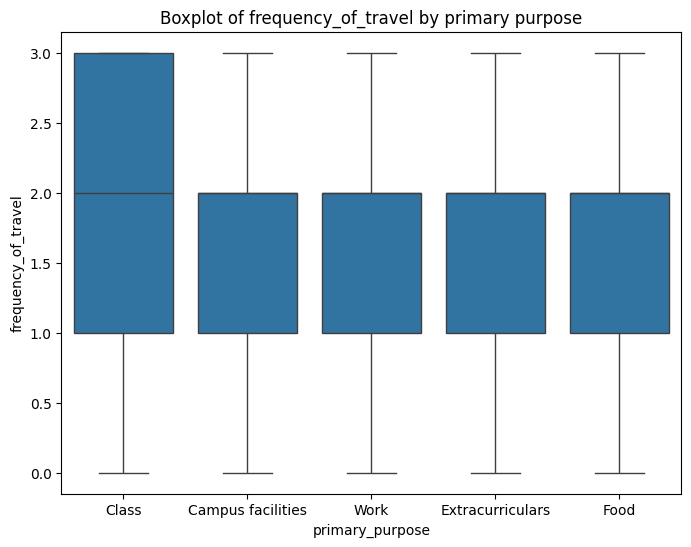

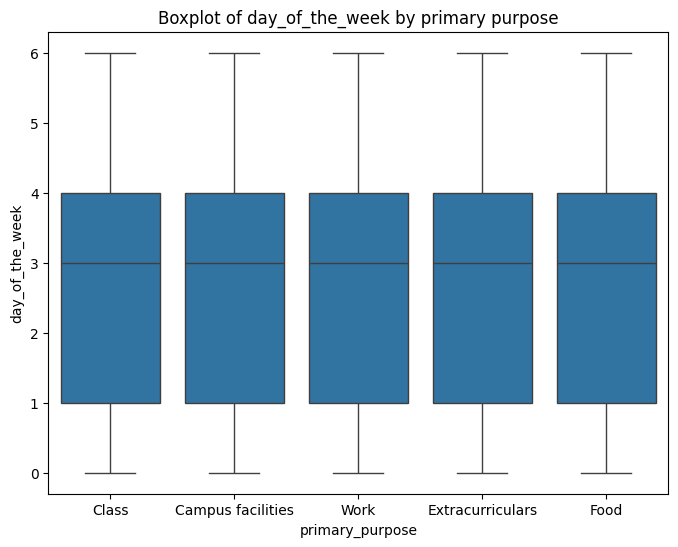

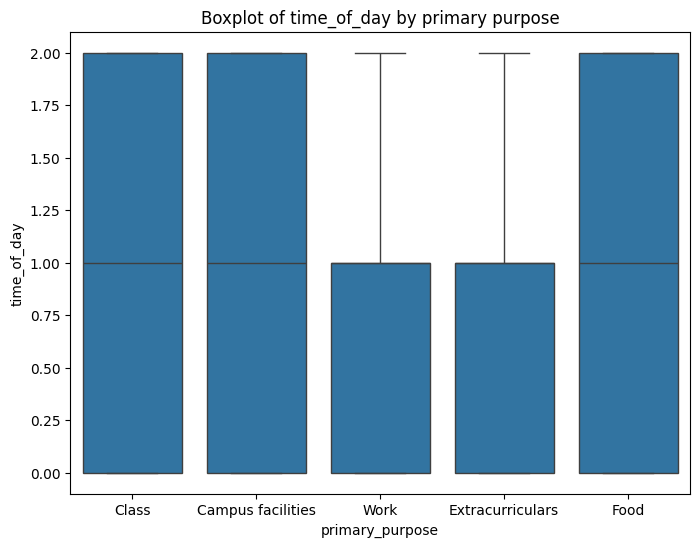

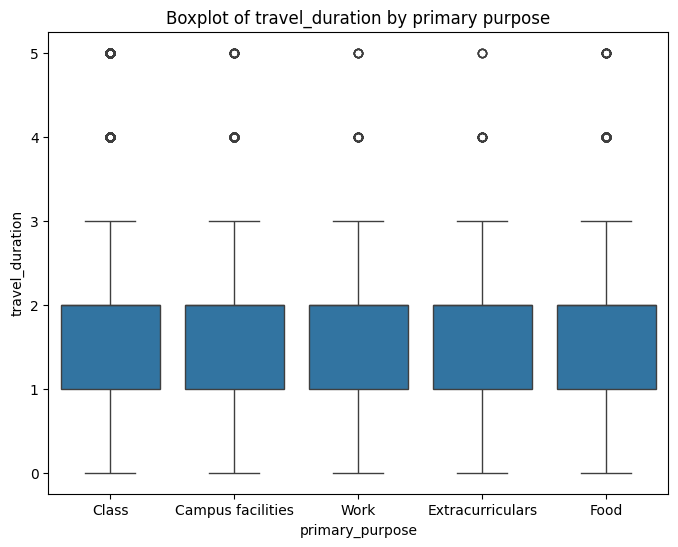

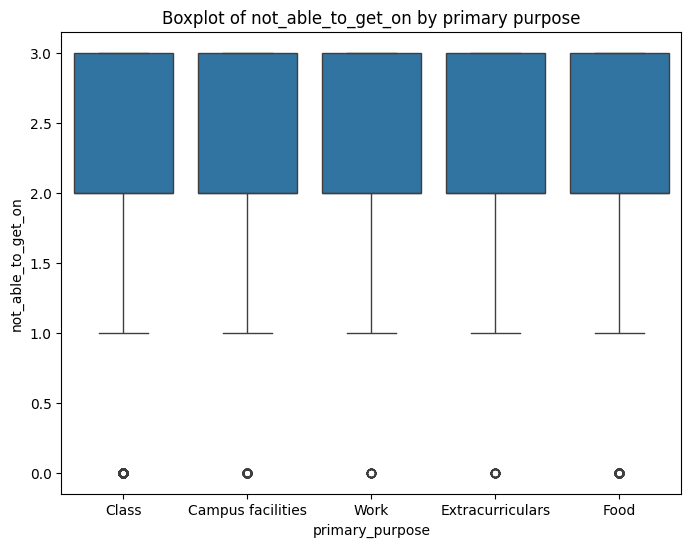

In [79]:
import seaborn as sns
# List of features to plot
features = ['frequency', 'punctuality', 'cleanliness', 'safety', 'coverage',
            'usage_influence_convenience', 'usage_influence_cost',
            'usage_influence_lack_of_options', 'usage_influence_availability_of_parking',
            'usage_influence_environmental', 'prioritize_frequency',
            'prioritize_punctuality', 'prioritize_cleanliness', 'prioritize_safety',
            'prioritize_bus_route_coverage', 'prioritize_crowdedness',
            'additional_features_frequency', 'additional_features_seats',
            'additional_features_cleanliness', 'additional_features_comfortable',
            'additional_features_route_coverage', 'additional_features_updates',
            'crowdedness', 'special_events', 'not_able_to_get_on',
            'frequency_of_travel', 'day_of_the_week', 'time_of_day', 'travel_duration', 'not_able_to_get_on']

# Create boxplots for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=data_encoded_all, x='primary_purpose', y=feature)
    plt.title(f'Boxplot of {feature} by primary purpose')
    plt.show()

Checking if there are differences in the nominal columns across primary_purpose through percentages

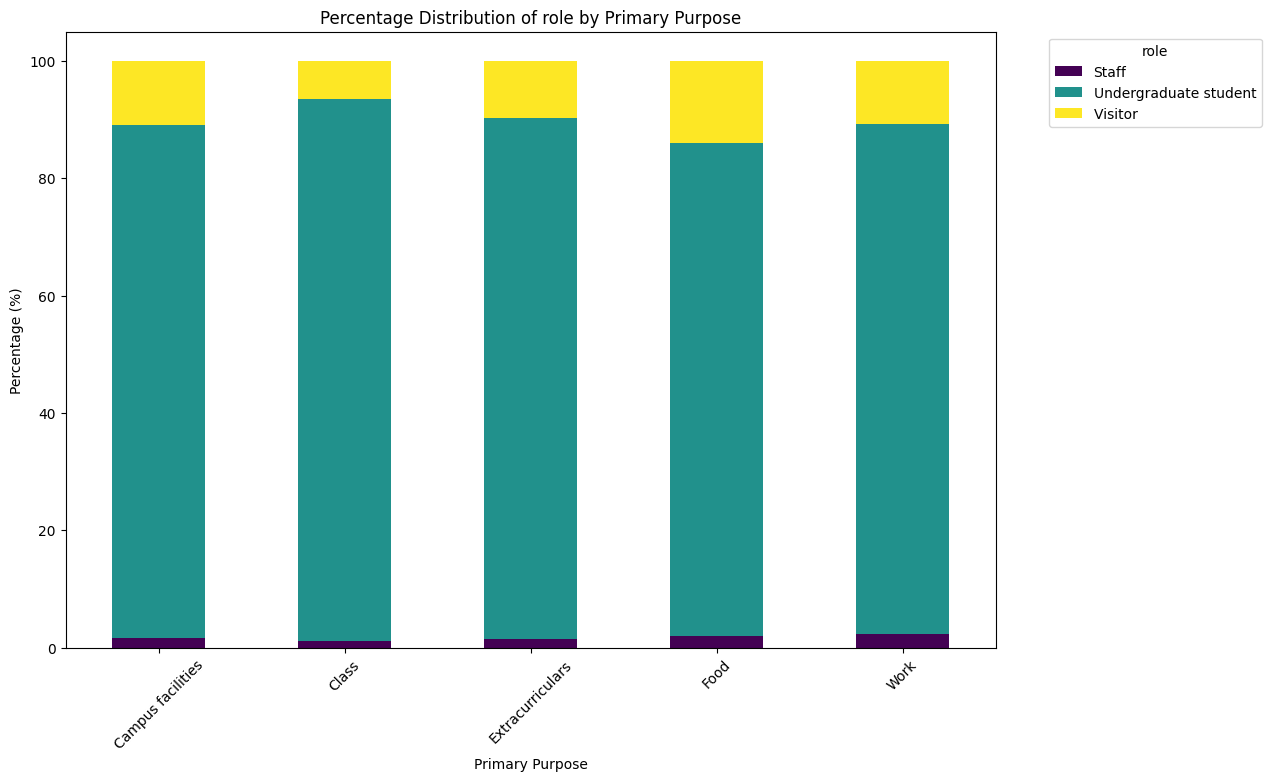

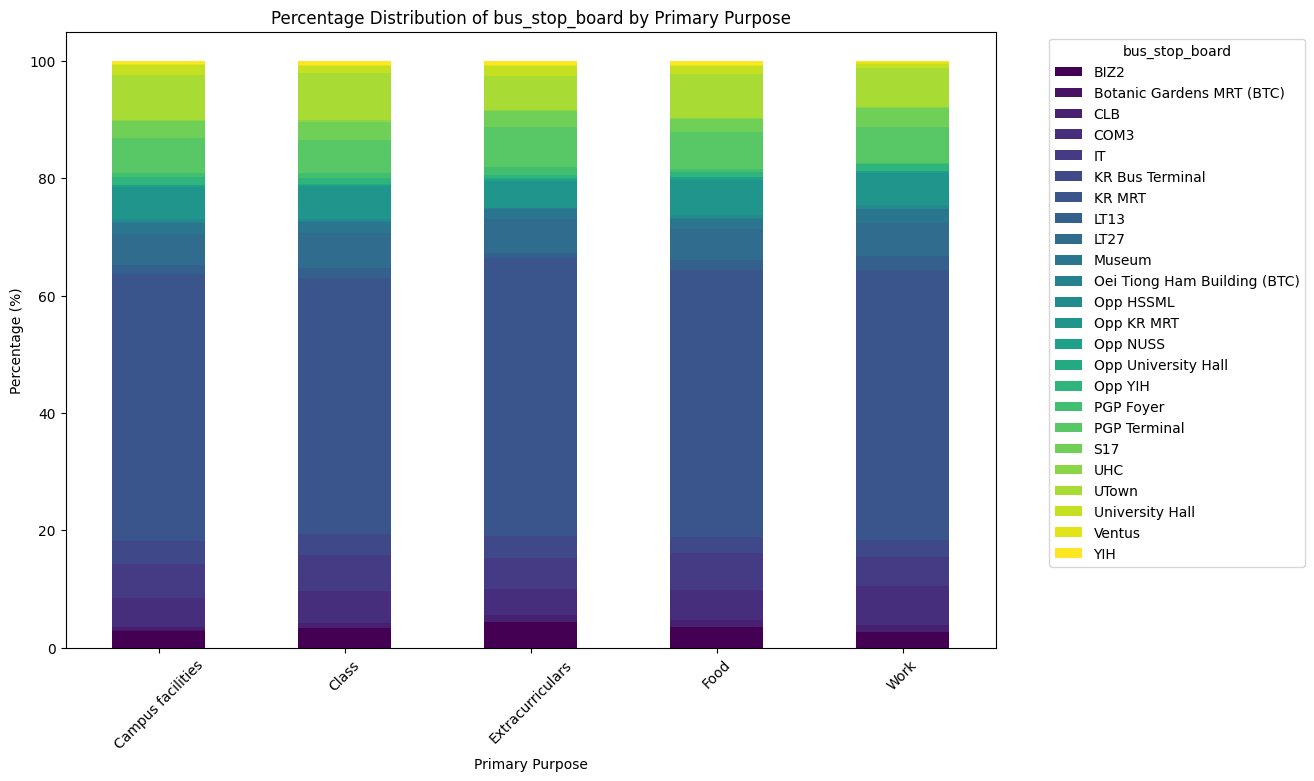

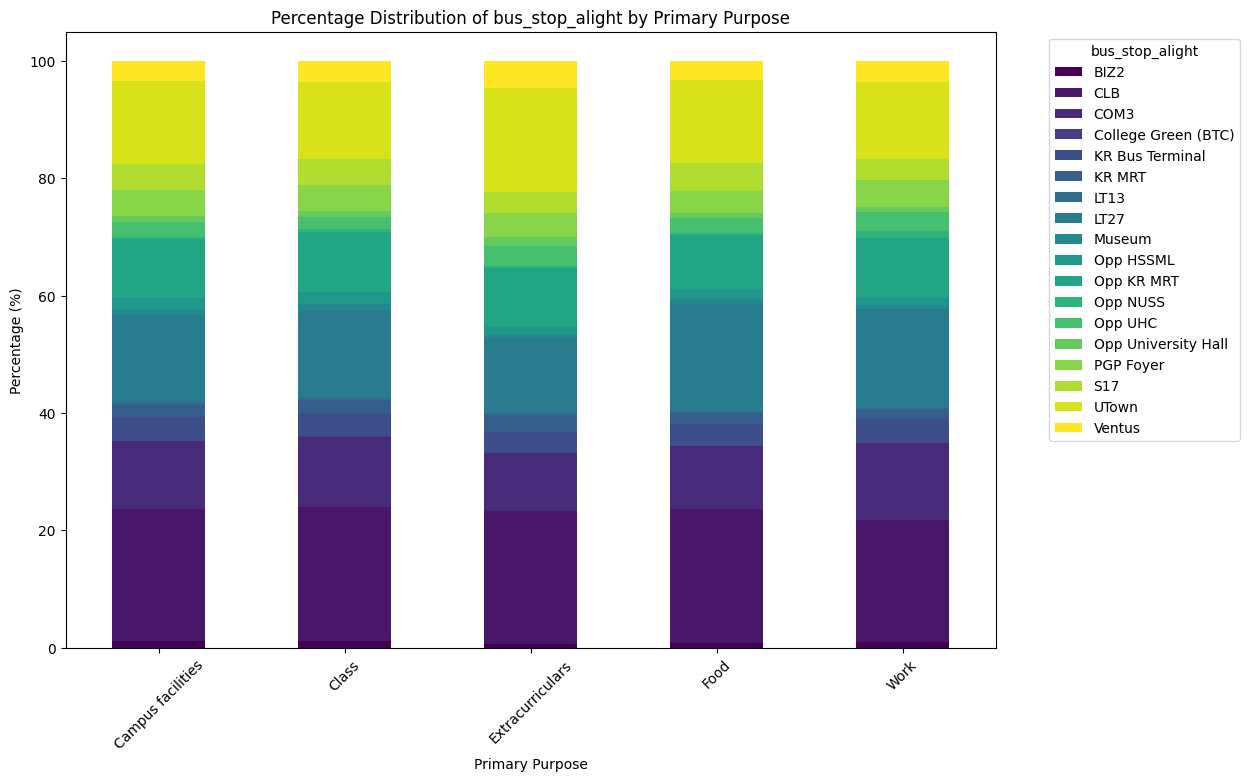

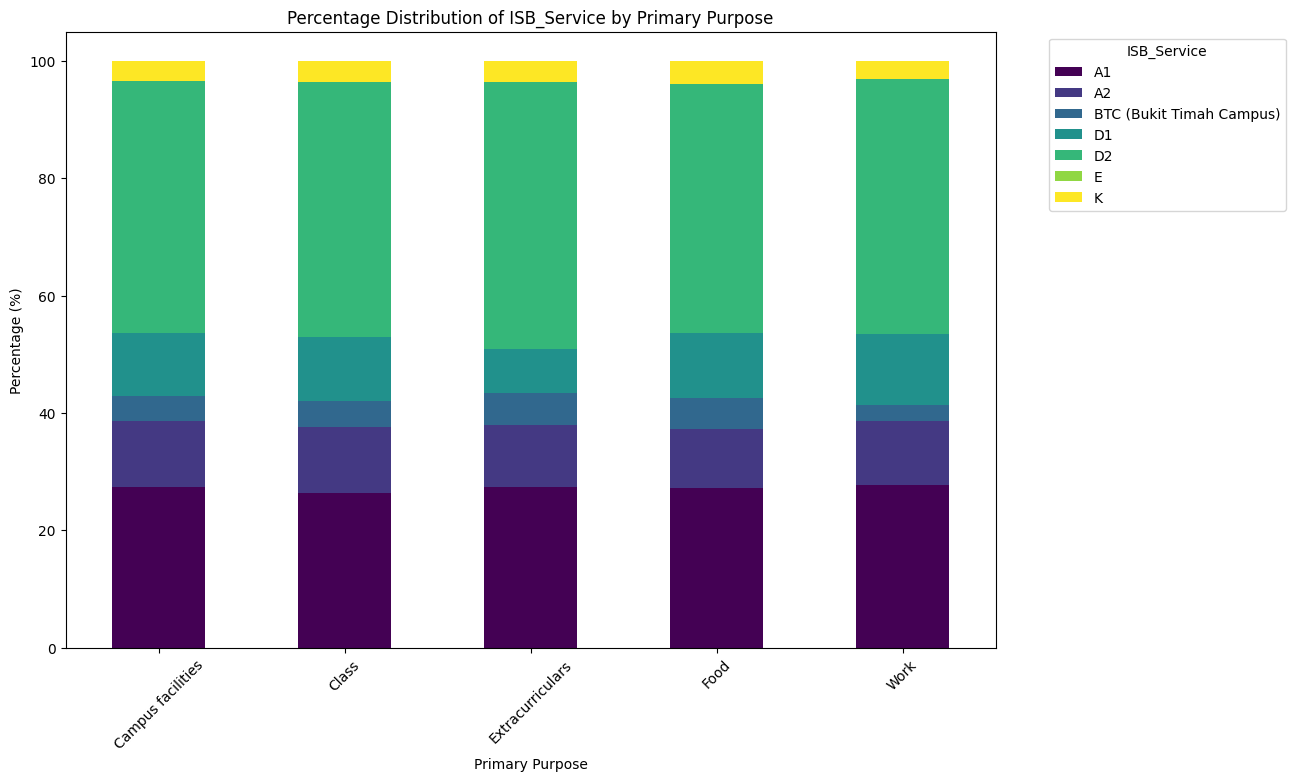

In [82]:
categorical_columns = ['role', 'bus_stop_board', 'bus_stop_alight', 'ISB_Service']

# creating a normalized count plot
for column in categorical_columns:
    data_counts = data_encoded_all.groupby(['primary_purpose', column]).size().unstack().fillna(0)
    data_percent = data_counts.div(data_counts.sum(axis=1), axis=0) * 100  # Converting to percentage

    ax = data_percent.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='viridis')
    plt.title(f'Percentage Distribution of {column} by Primary Purpose')
    plt.xlabel('Primary Purpose')
    plt.ylabel('Percentage (%)')

    plt.legend(title=column, bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.xticks(rotation=45)
    plt.show()